In [3]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

from glob import glob

import cv2
import matplotlib.pylab as plt

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/cat-and-dog/test_set/test_set/dogs/dog.4329.jpg
/kaggle/input/cat-and-dog/test_set/test_set/dogs/dog.4223.jpg
/kaggle/input/cat-and-dog/test_set/test_set/dogs/dog.4253.jpg
/kaggle/input/cat-and-dog/test_set/test_set/dogs/dog.4190.jpg
/kaggle/input/cat-and-dog/test_set/test_set/dogs/dog.4354.jpg
/kaggle/input/cat-and-dog/test_set/test_set/dogs/dog.4136.jpg
/kaggle/input/cat-and-dog/test_set/test_set/dogs/dog.4226.jpg
/kaggle/input/cat-and-dog/test_set/test_set/dogs/dog.4214.jpg
/kaggle/input/cat-and-dog/test_set/test_set/dogs/dog.4888.jpg
/kaggle/input/cat-and-dog/test_set/test_set/dogs/dog.4170.jpg
/kaggle/input/cat-and-dog/test_set/test_set/dogs/dog.4323.jpg
/kaggle/input/cat-and-dog/test_set/test_set/dogs/dog.4262.jpg
/kaggle/input/cat-and-dog/test_set/test_set/dogs/dog.4788.jpg
/kaggle/input/cat-and-dog/test_set/test_set/dogs/dog.4657.jpg
/kaggle/input/cat-and-dog/test_set/test_set/dogs/dog.4387.jpg
/kaggle/input/cat-and-dog/test_set/test_set/dogs/dog.4255.jpg
/kaggle/

# reading images

In [4]:
# below code returns the list of files based on given folder path and the extension
cat_files = glob('../input/cat-and-dog/training_set/training_set/cats/*.jpg')
dog_files = glob('../input/cat-and-dog/training_set/training_set/dogs/*.jpg')
dog_files

['../input/cat-and-dog/training_set/training_set/dogs/dog.3443.jpg',
 '../input/cat-and-dog/training_set/training_set/dogs/dog.1942.jpg',
 '../input/cat-and-dog/training_set/training_set/dogs/dog.375.jpg',
 '../input/cat-and-dog/training_set/training_set/dogs/dog.3259.jpg',
 '../input/cat-and-dog/training_set/training_set/dogs/dog.790.jpg',
 '../input/cat-and-dog/training_set/training_set/dogs/dog.704.jpg',
 '../input/cat-and-dog/training_set/training_set/dogs/dog.3593.jpg',
 '../input/cat-and-dog/training_set/training_set/dogs/dog.3287.jpg',
 '../input/cat-and-dog/training_set/training_set/dogs/dog.83.jpg',
 '../input/cat-and-dog/training_set/training_set/dogs/dog.1494.jpg',
 '../input/cat-and-dog/training_set/training_set/dogs/dog.222.jpg',
 '../input/cat-and-dog/training_set/training_set/dogs/dog.2680.jpg',
 '../input/cat-and-dog/training_set/training_set/dogs/dog.3490.jpg',
 '../input/cat-and-dog/training_set/training_set/dogs/dog.901.jpg',
 '../input/cat-and-dog/training_set/train

In [5]:
cat_files[2]

'../input/cat-and-dog/training_set/training_set/cats/cat.2842.jpg'

In [6]:
img_mpl = plt.imread(cat_files[20])
img_cv2 = cv2.imread(cat_files[20])


In [7]:
img_cv2.shape, img_mpl.shape

((232, 350, 3), (232, 350, 3))

In [9]:
img_mpl

array([[[ 71,  70,  68],
        [ 70,  69,  67],
        [ 64,  63,  61],
        ...,
        [163, 167,  90],
        [164, 168,  91],
        [161, 165,  88]],

       [[ 72,  71,  69],
        [ 71,  70,  68],
        [ 64,  63,  61],
        ...,
        [162, 166,  89],
        [163, 167,  90],
        [160, 164,  87]],

       [[ 72,  71,  69],
        [ 71,  70,  68],
        [ 65,  64,  62],
        ...,
        [161, 165,  88],
        [162, 166,  89],
        [159, 163,  86]],

       ...,

       [[ 56,  55,  51],
        [ 57,  56,  52],
        [ 54,  53,  49],
        ...,
        [ 68,  51,  59],
        [ 71,  54,  62],
        [ 75,  58,  66]],

       [[ 56,  55,  51],
        [ 56,  55,  51],
        [ 53,  52,  48],
        ...,
        [ 70,  53,  61],
        [ 72,  55,  63],
        [ 76,  59,  67]],

       [[ 55,  54,  50],
        [ 56,  55,  51],
        [ 53,  52,  48],
        ...,
        [ 76,  59,  67],
        [ 77,  60,  68],
        [ 76,  59,  67]]

In [10]:
img_mpl.flatten()

array([71, 70, 68, ..., 76, 59, 67], dtype=uint8)

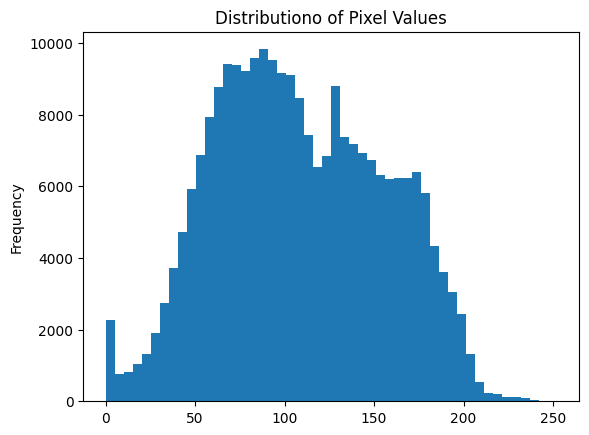

In [15]:
pd.Series(img_mpl.flatten()).plot(kind='hist',bins=50,title='Distributiono of Pixel Values')
plt.show()

# display images

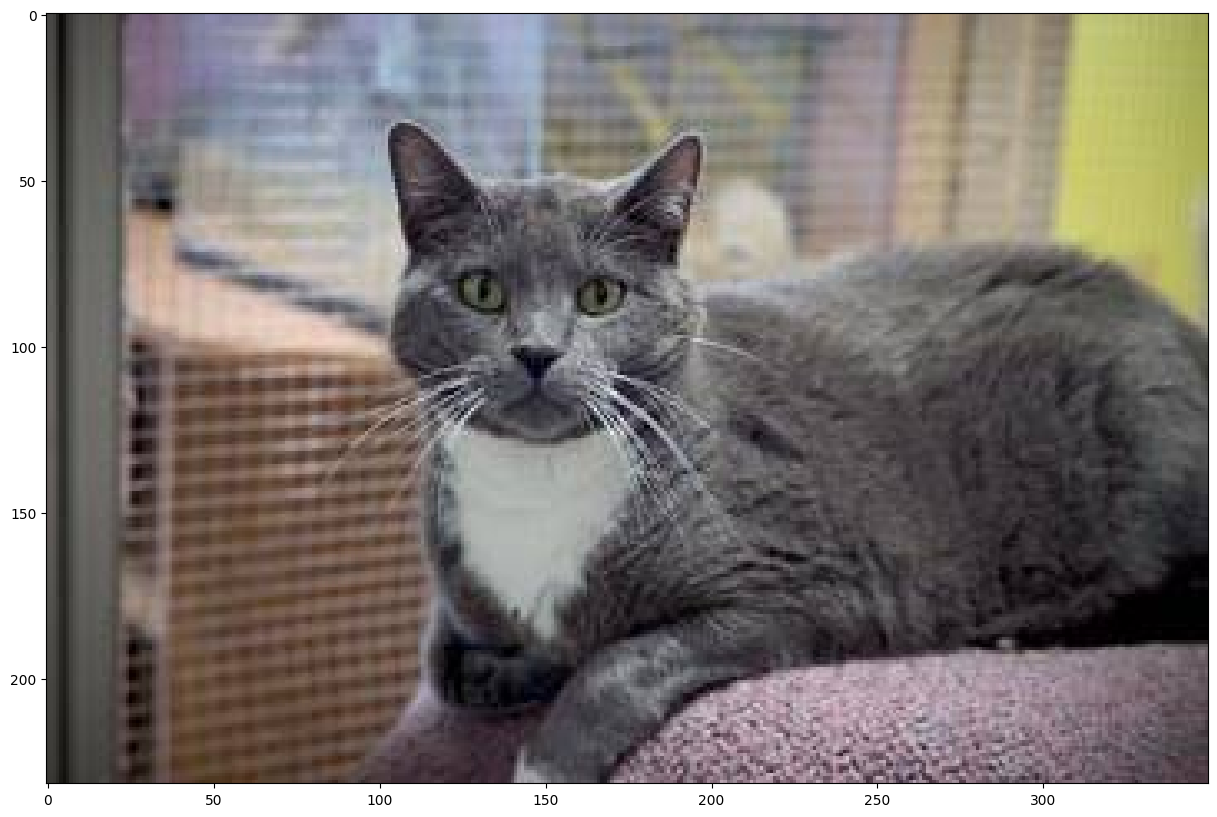

In [17]:
fig, ax = plt.subplots(figsize=(20,10))
ax.imshow(img_mpl)
ax.axis=('off')
plt.show()

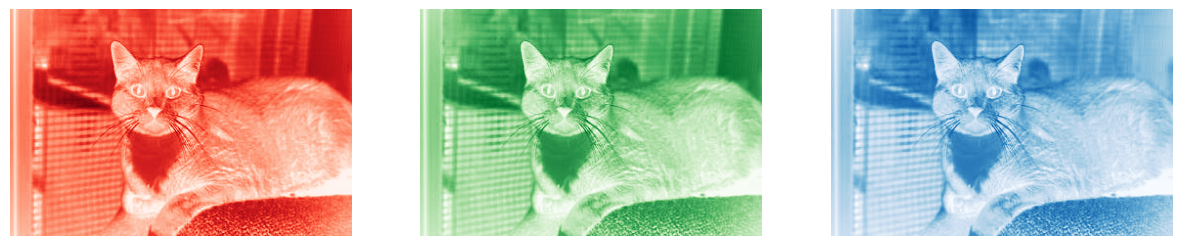

In [19]:
# display all RGB channels of the above image

fig, axs = plt.subplots(1,3, figsize=(15,5))
axs[0].imshow(img_mpl[:,:,0], cmap='Reds')
axs[1].imshow(img_mpl[:,:,1],cmap='Greens')
axs[2].imshow(img_mpl[:,:,2], cmap='Blues')
axs[0].axis('off')
axs[1].axis('off')
axs[2].axis('off')
plt.show()

# difference between matplotlib vs cv2
* cv2 reads in channels as BGR
* matplotlib read as RGB

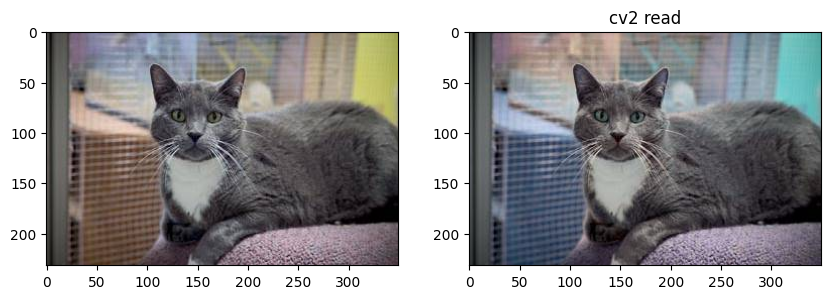

In [22]:
fig, axs = plt.subplots(1,2, figsize=(10,5))
axs[0].imshow(img_mpl)
axs[1].imshow(img_cv2)
axs[1].set_title('cv2 read')
plt.show()

# converting from BGR to RGB

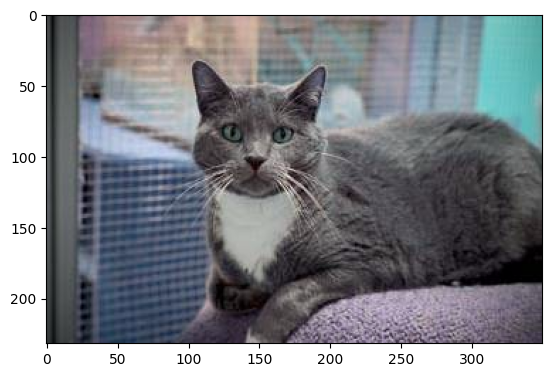

In [24]:
img_cv2_rgb = cv2.cvtColor(img_mpl, cv2.COLOR_BGR2RGB)
fig, ax = plt.subplots()
ax.imshow(img_cv2_rgb)
plt.show()

# image manipulation

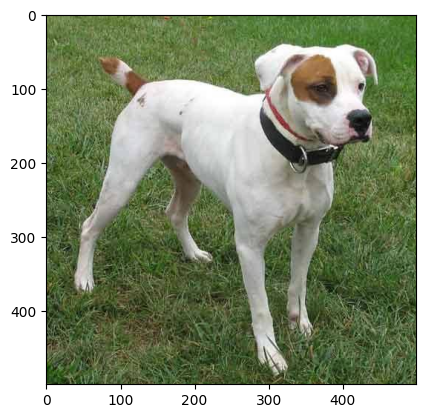

In [26]:
img = plt.imread(dog_files[4])
fig, ax = plt.subplots()
ax.imshow(img)
plt.show()

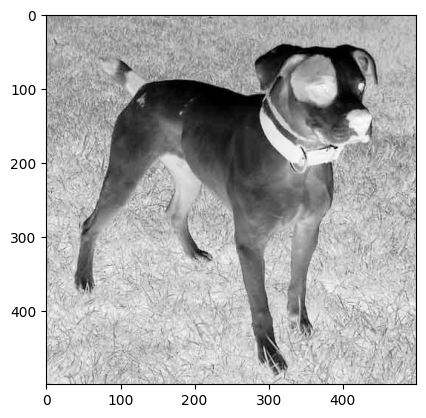

In [27]:
img_gray  = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
fig, ax = plt.subplots()
ax.imshow(img_gray, cmap='Greys')
ax.axis('off')
plt.show()

# resizing and scaling of the image

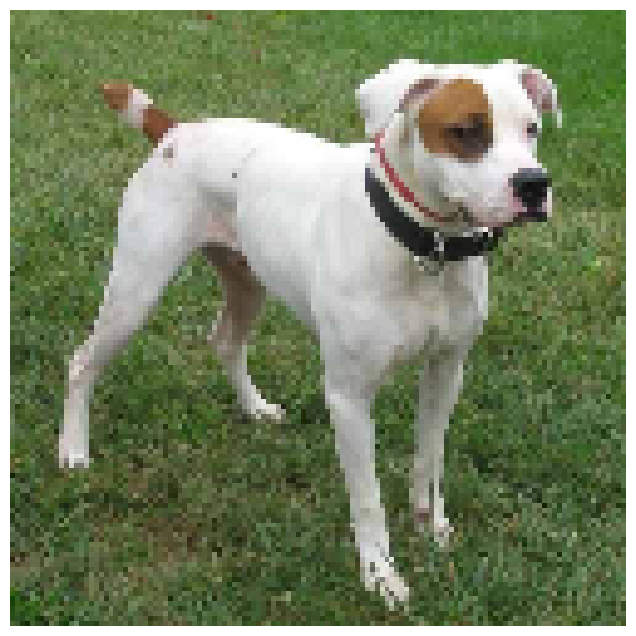

In [32]:
img_resized  = cv2.resize(img,None, fx=0.25, fy=0.25) # percentages
fig, ax = plt.subplots(figsize=(8,8))
ax.imshow(img_resized )
ax.axis('off')
plt.show()

In [33]:
img_resized.shape

(125, 125, 3)

# different 

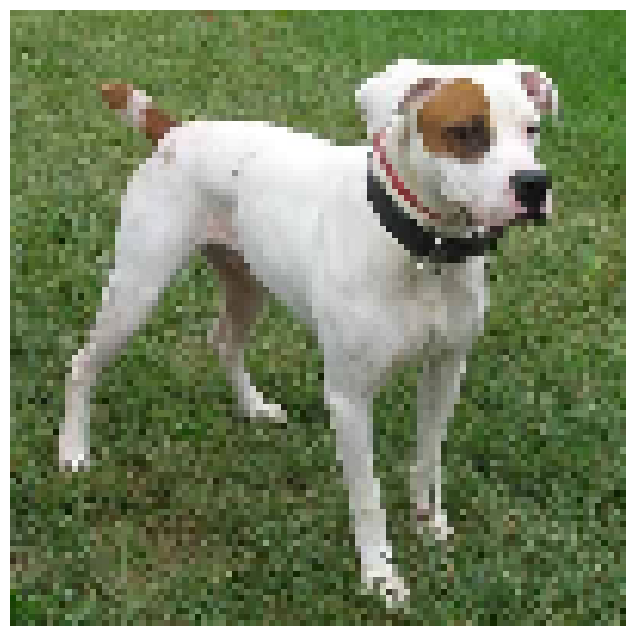

In [34]:

img_resize=cv2.resize(img, (100,100)) # height, width
fig, ax = plt.subplots(figsize=(8,8))
ax.imshow(img_resize )
ax.axis('off')
plt.show()

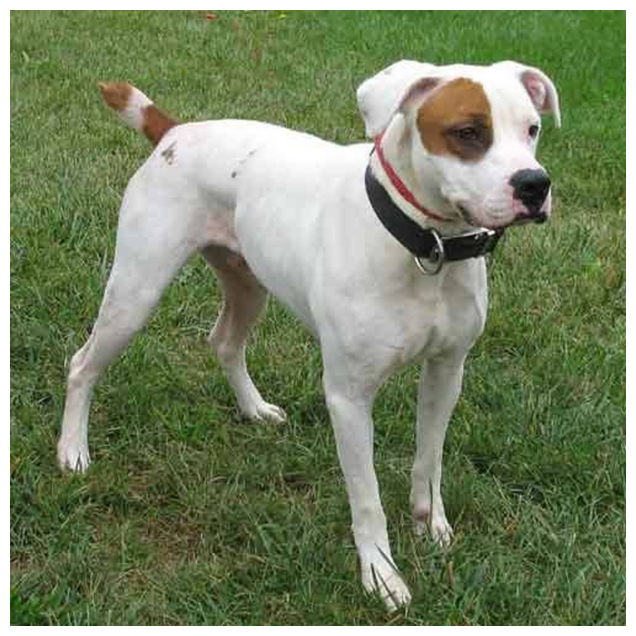

In [36]:
# for upsize , have to use an interpolation

img_resize = cv2.resize (img, (5000,5000), interpolation=cv2.INTER_CUBIC)
fig, ax = plt.subplots(figsize=(8,8))
ax.imshow(img_resize )
ax.axis('off')
plt.show()

In [38]:
img_resize.shape, img.shape

((5000, 5000, 3), (499, 500, 3))

# CV2 Kernels
<img src="https://editor.analyticsvidhya.com/uploads/81269Capture.PNG" alt="imgpixels" style="width:400px;"/>

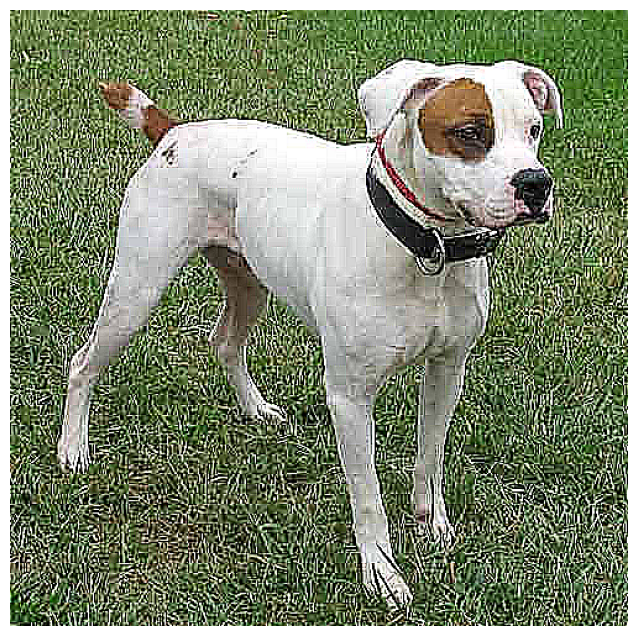

In [40]:
# sharpen Image

Kernel_sharpening = np.array([[-1,-1,-1],
                            [-1,9,-1],
                            [-1,-1,-1]])
sharpened = cv2.filter2D(img, -1, Kernel_sharpening)
fig, ax = plt.subplots(figsize=(8,8))
ax.imshow(sharpened )
ax.axis('off')
plt.show()

In [41]:
sharpened.shape

(499, 500, 3)

# Blurring the image

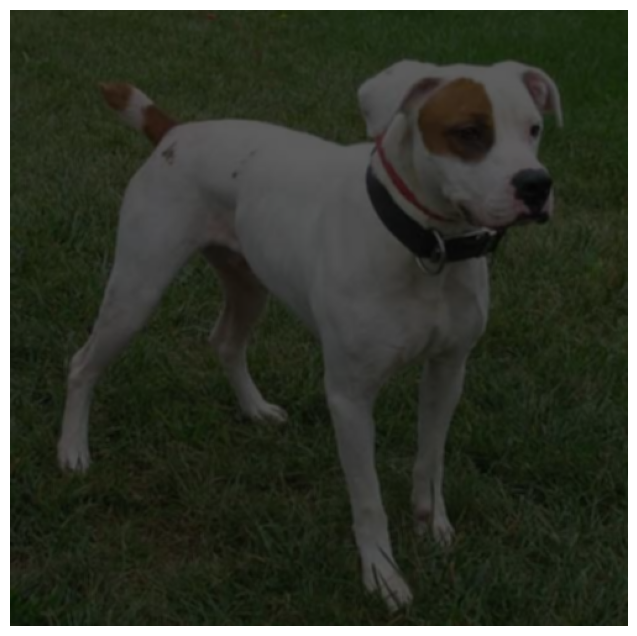

In [44]:
kernel_3x3 = np.ones((3,3), np.float32) /25
blurred = cv2.filter2D(img, -1, kernel_3x3)
fig, ax = plt.subplots(figsize=(8,8))
ax.imshow(blurred )
ax.axis('off')
plt.show()

# save images


In [45]:
plt.imsave('blurred_dog.png', blurred)
cv2.imwrite('cv2_dog.png',blurred)

True

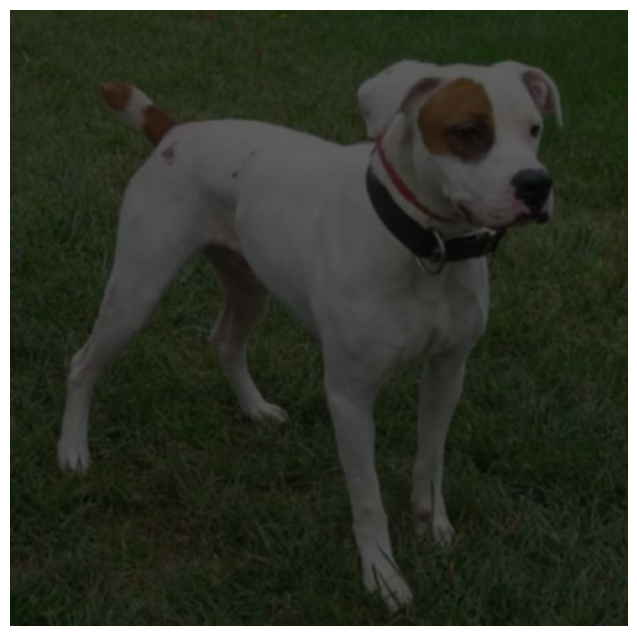

In [46]:
new_img = plt.imread('/kaggle/working/blurred_dog.png')

fig, ax = plt.subplots(figsize=(8,8))
ax.imshow(new_img )
ax.axis('off')
plt.show()